<a href="https://colab.research.google.com/github/yuks0810/Ensemble-Machine-Learning-Techniques-/blob/master/House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **House Prices: Advanced Regression Techniques**
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

部屋の大きさや、駐車場の数などの特徴量から価格を予測する。

参考ノート：
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

Data fields
Here's a brief version of what you'll find in the data description file.

```
SalePrice - 建物の売却価格 (ドル)。これは、予測しようとしているターゲット変数です。
MSSubClass: 建物クラス
MSZoning: 一般的な敷地の定義方の分類
LotFrontage: 建物に隣接している道路の直線の距離（フィート）
LotArea: 敷地面積（平方フィート）
Street:　アクセスできる道路の名前
Alley: アクセスできる路地の名前
LotShape: 物件の形状
LandContour: 物件の高さ（平面性）
Utilities: 利用可能な設備の種類
LotConfig: ロット構成
LandSlope: 物件の傾斜
Neighborhood: 近くにある施設
Condition1: 幹線道路・鉄道への近接性
Condition2: 幹線道路や鉄道に近い
BldgType: 住戸の種類
HouseStyle: 住まいのスタイル
OverallQual: 全体的な材料と仕上げの品質
OverallCond: 全体的な状態評価
YearBuilt: 物件が完成した日付
YearRemodAdd: リモデル日付
RoofStyle: 屋根の形
RoofMatl:　屋根の材料
Exterior1st: 家の外壁
Exterior2nd: 家の外壁塗装（複数の材料がある場合）
MasVnrType: メイソンリーベニヤタイプ
MasVnrArea: 石積み単板の面積
ExterQual: 外装材の品質
ExterCond: 外装材の現在の状態
Foundation: 財団の種類
BsmtQual: 地下室の高さ
BsmtCond: 地下室の一般的な状態
BsmtExposure: ベランダまたはガーデンレベルの地下室の壁
BsmtFinType1: 地下室の完成品の品質
BsmtFinSF1: タイプ1完成の面積：平方フィート
BsmtFinType2: 第二仕上げエリアの品質（存在する場合）
BsmtFinSF2: タイプ2完成の面積：平方フィート
BsmtUnfSF: 地下室面積の未完成の面積：平方フィート
TotalBsmtSF: 地下室面積の合計平方フィート
Heating: 暖房の種類
HeatingQC:　暖房の品質と状態
CentralAir: メインエアコンの状態
Electrical: 電気システム
1stFlrSF: １階の面積
2ndFlrSF: ２階の面積
LowQualFinSF: 低品質の完成した平方フィート
GrLivArea: グレード（地上）リビングエリアの面積：平方フィート
BsmtFullBath: 地下のフルバスルーム
BsmtHalfBath: 地下のハーフバスルーム
FullBath: 地上のフルバスルーム
HalfBath: 地上のハーフバスルーム
Bedroom: 地下1階以上のベッドルーム数
Kitchen: キッチンの数
KitchenQual: キッチンの品質
TotRmsAbvGrd: 地上の部屋数（バスルームは含まない）
Functional:　住宅機能評価
Fireplaces: 暖炉の数
FireplaceQu: 暖炉の品質
GarageType: ガレージの場所
GarageYrBlt: ガレージが建てられた日付
GarageFinish: ガレージの内装仕上げ
GarageCars: ガレージのサイズ（何台止められるか）
GarageArea: ガレージの面積
GarageQual: ガレージの品質
GarageCond: ガレージの状態
PavedDrive: 舗装されたドライブウェイ
WoodDeckSF: ウッドデッキ面積（平方フィート
OpenPorchSF: オープンポーチの面積（平方フィート
EnclosedPorch: 密閉されたポーチの面積（平方フィート
3SsnPorch: スリーシーズンポーチ面積（平方フィート
ScreenPorch: スクリーンポーチの面積（平方フィート
PoolArea: プールの面積（平方フィート
PoolQC: プールの品質
Fence: フェンスの品質
MiscFeature: 他のカテゴリではカバーされていない雑多な機能
MiscVal: 雑多な機能の値段（$)
MoSold: 売却月
YrSold: 売却年
SaleType: セールの種類
SaleCondition: 売却の条件
```

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df_train = pd.read_csv('/content/drive/My Drive/kaggle/data/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/content/drive/My Drive/kaggle/data/house-prices-advanced-regression-techniques/test.csv')
# null値を落とす
# train = train.dropna()
# test = test.dropna()
print(df_train.shape)

df_train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [29]:
# トレーニングデータの全てのカラムを表示する
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

ここで、次にデータにどのような相関関係があるのかを見ていく。

# **女性に例えて、「SalePriceとの出会い」というストーリーを作ってみる。**

きっかけは、Kaggleパーティーでダンスの相手を探していたときのこと。しばらくダンスフロアを探していると、バーの近くでダンスシューズを履いている女の子を見つけた。そのシューズやドレスは彼女がダンスをするためにそこにいるというサインを示している。僕たちは予測モデリングをしたり、アナリティクスの大会に参加したりすることに時間を費やしているので、女の子と話す能力は全くといっていいほどない。それでも 試しにやってみた

やあ！僕は小杉！あなたの名前は？SalePriceちゃんていうんだ？素敵な名だね。SalePriceちゃん、君のデータを教えてくれないかな？二人の関係がうまくいく確率を 計算するモデルを開発したんだ！！それを僕たちの次回の恋活イベントで試してみたいんだ。

In [30]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

なるほど...最低価格がゼロよりも大きいね。いいね！君は僕のモデルを破壊するようなnull値や0を持っていない！最高だ！

あと、何か写真とかある？例えばー... 海辺にいる時の写真とか、んー、 ジムでの自撮りとか...

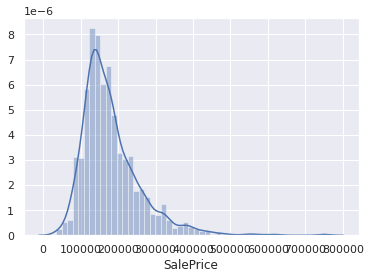

In [31]:
#histogram
sns.distplot(df_train['SalePrice']);

おっふ、最高じゃん！なまらいい写真じゃん！
（えー、好き。）

```
・正規分布ではない
・正の歪度を持っている
・ピークを示す
```
いいじゃんいいじゃん！ "SalePrice "ちゃんの体のスリーサイズとか教えてくれないか？

In [32]:
#skewness and kurtosis
print("Skewness（歪度）: %f" % df_train['SalePrice'].skew())
print("Kurtosis（尖度）: %f" % df_train['SalePrice'].kurt())

Skewness（歪度）: 1.882876
Kurtosis（尖度）: 6.536282


歪度と尖度
https://bellcurve.jp/statistics/course/17950.html

おーあ、スゴイ！僕の恋愛計算が正しければ、成功確率は97.834657%だ。
また、今度あってどこかに行こうよ！俺の電話番号をあげるね！来週の金曜日が空いていたら電話して。また今度ね！

# SalePriceちゃんの仲間と興味のあること

戦う場所の地形を選ぶのは軍事的な知恵だ。SalePriceちゃんが立ち去るや否や、Facebookへ。

よーし、これで本格的に分析開始だ！腕の見せ所だね。これはストーカー行為ではい。ただの猛烈な調査だ。

プロフィールによると 共通の友人がいる。「Chuck Norris」以外にも、「GrLivArea」や「TotalBsmtSF」も知るな。それに、「OverallQual」や「YearBuilt」などの共通の趣味も持るジャン。これは期待できそうだ。

私たちの研究を最大限に活用するために、まずは共通の友人のプロフィールをよく見ることから始め、後は共通の関心事に焦点を当てていきます。（相関関係を見つけていく）

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


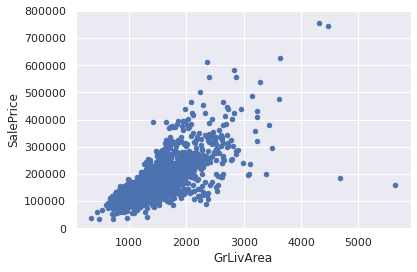

In [33]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

うーん...。SalePriceちゃんと「GrLivArea」という人は直線的な関係だ。幼なじみとか、古くからの友人かな？よく関係性がある。

（彼氏じゃないだろうな）

TotalBsmtSFという人はどうだろう？

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


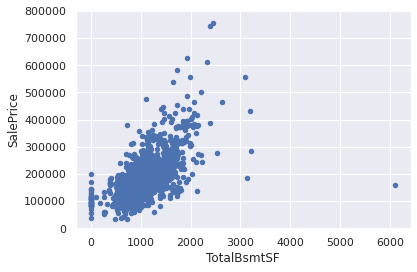

In [34]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'TotalBsmtSF'は'SalePrice'の大親友でもあるみたいだ、こちらの方がはるかに感情的な関係のよう。何もかもがオッケーなのに、突然、強い直線的（指数的？しかも、時々「TotalBsmtSF」いないと、「SalePrice」ちゃんをゼロにしてしまうことがある。。



### Relationship with categorical features

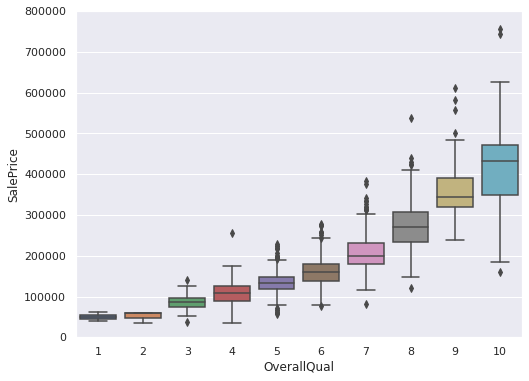

In [35]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);


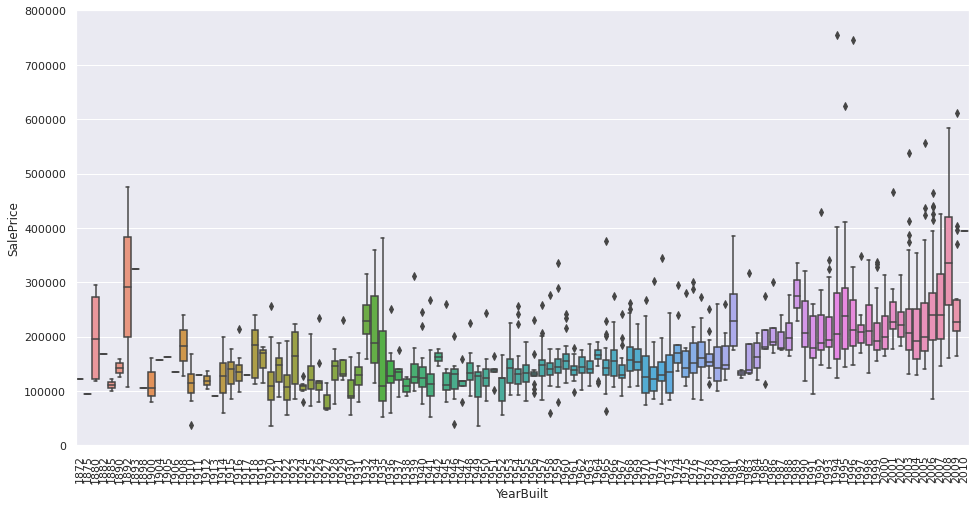

In [36]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);


強い傾向ではありませんが、「SalePrice」ちゃんは古い物よりも新しいものに多くのお金を費やす傾向があると思るんだな。

注：「SalePrice」が定価かどうかはわかりません。一定の価格はインフレの影響を排除しようとします。 「SalePrice」が一定の価格にない場合は、そうする必要があります。そのため、価格は長年にわたって比較可能です。

**In summary:**

要約すれば、
お話はさておき、こう結論付けることができます：

- 「GrLivArea」と「TotalBsmtSF」は「SalePrice」と線形に関連しているようです。両方の関係は正です。つまり、1つの変数が増加すると、もう1つの変数も増加します。 「TotalBsmtSF」の場合、線形関係の傾きが特に大きいことがわかります。
- 「OverallQual」と「YearBuilt」も「SalePrice」に関連しているようです。 &#39;OverallQual&#39;の場合、関係はより強いようです。

ボックスプロットは、販売価格が全体的な品質とともにどのように増加するかを示しています。4つの変数を分析しただけですが、分析する必要のある変数は他にもたくさんあります。ここでのトリックは、正しい機能の選択（機能の選択）であり、それらの間の複雑な関係の定義（機能エンジニアリング）ではないようです。

That said, let's separate the wheat from the chaff.
(役立つもの、高品質なものを雑多の中から寄り分けましょう)

# 3.落ち着いてスマートに作業する

これまでは、直感に従い、重要だと考えた変数を分析していました。分析に客観的な思考が必要なのにもかかわらず、出発点は主観的であったと言わざるを得ません。

「プラズマスープ」<br>
当初、宇宙にはプラズマスープ以外は何もありませんでした。宇宙論の研究の開始時に、これらの短い瞬間について知られていることは、主に推測です。しかし、科学は今日の宇宙について知られていることに基づいて、おそらく何が起こったのかについてのいくつかのスケッチを考案しました。 <br>（ソース：http://umich.edu/~gs265/bigbang.htm）

宇宙のカオスを探索するために、「プラズマスープ」を理解するための実用的なレシピから始めます。

相関行列（ヒートマップスタイル）。<br>
'SalePrice'相関行列（ヒートマップのズームスタイル）。<br>
最も相関のある変数間の散布図（ジャガースタイルのように移動）。

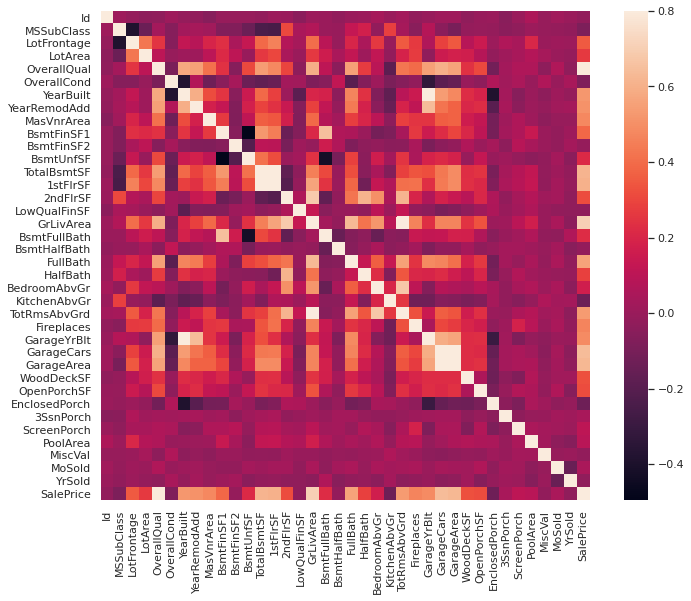

In [37]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

このヒートマップは、「プラズマスープ」とその関係の概要をすばやく把握するための最良の方法です。 （Thank you!@seaborn）

みてみると、注目を集める2つの赤い正方形があります。最初の変数は「TotalBsmtSF」と「1stFlrSF」変数で、2番目の変数は「GarageX」変数です。どちらの場合も、これらの変数間の相関関係の重要度を示しています。実際、この相関は非常に強いため、多重共線性の状況を示している可能性があります。これらの変数について考えると、それらはほぼ同じ情報を提供するため、多重共線性が実際に発生すると結論付けることができます。ヒートマップはこの種の状況を検出するのに最適であり、ヒートマップは私たちのように機能選択によって支配される問題では不可欠なツールです。

もう1つ重要な点は、「SalePrice」の相関関係です。よく知られている「GrLivArea」、「TotalBsmtSF」、および「OverallQual」がも目立ちますが、他にも考慮に入れる必要のある変数がたくさん確認できます。

ではそれらを次にみていきましょう。

**'SalePrice' correlation matrix (zoomed heatmap style)**

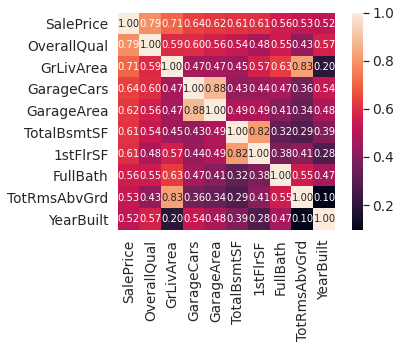

In [38]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

ヒートマップによれば、これらが「SalePrice」と最も相関する変数です。：

「OverallQual」、「GrLivArea」、「TotalBsmtSF」は「SalePrice」と強い相関があります。CHECK!

'GarageCars'および 'GarageArea'は、最も強く相関する変数の一部です。ただし、前のサブポイントで説明したように、ガレージに収まる車の数はガレージエリアの結果です。 「ガレージカー」と「ガレージエリア」は互いに相関があるので、それらを区別することはできません。したがって、分析ではこれらの変数のどちらか1つだけが必要です（ 'SalePrice'との相関が高いため、 'GarageCars'を保持できます）。

「TotalBsmtSF」と「1stFloor」も同様に双子の兄弟のようなものです。最初の推測が正しかったと言うだけのために、「TotalBsmtSF」を保持できます。
「TotRmsAbvGrd」と「GrLivArea」、も双子の兄弟ですね。

ああ・・・ 『YearBuilt』 ・・・ 『YearBuilt』は 『SalePrice』と若干相関があるようです。正直なところ、これを正しく行うには少し時系列分析を行う必要があると感じ始めたため、「YearBuilt」について考えるのは怖いです。これは宿題として残しておきます。
散布図に進みましょう。

**Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)**

この散布図は最高のデータ分析手法です！！初めて私がこの散布図を見たとき、私は驚愕でぶっ飛びました！みてください！非常に小さいスペースに多くの情報が...素晴らしいです！ Again, Thank you @seaborn！ You make me 'move like Jagger'!

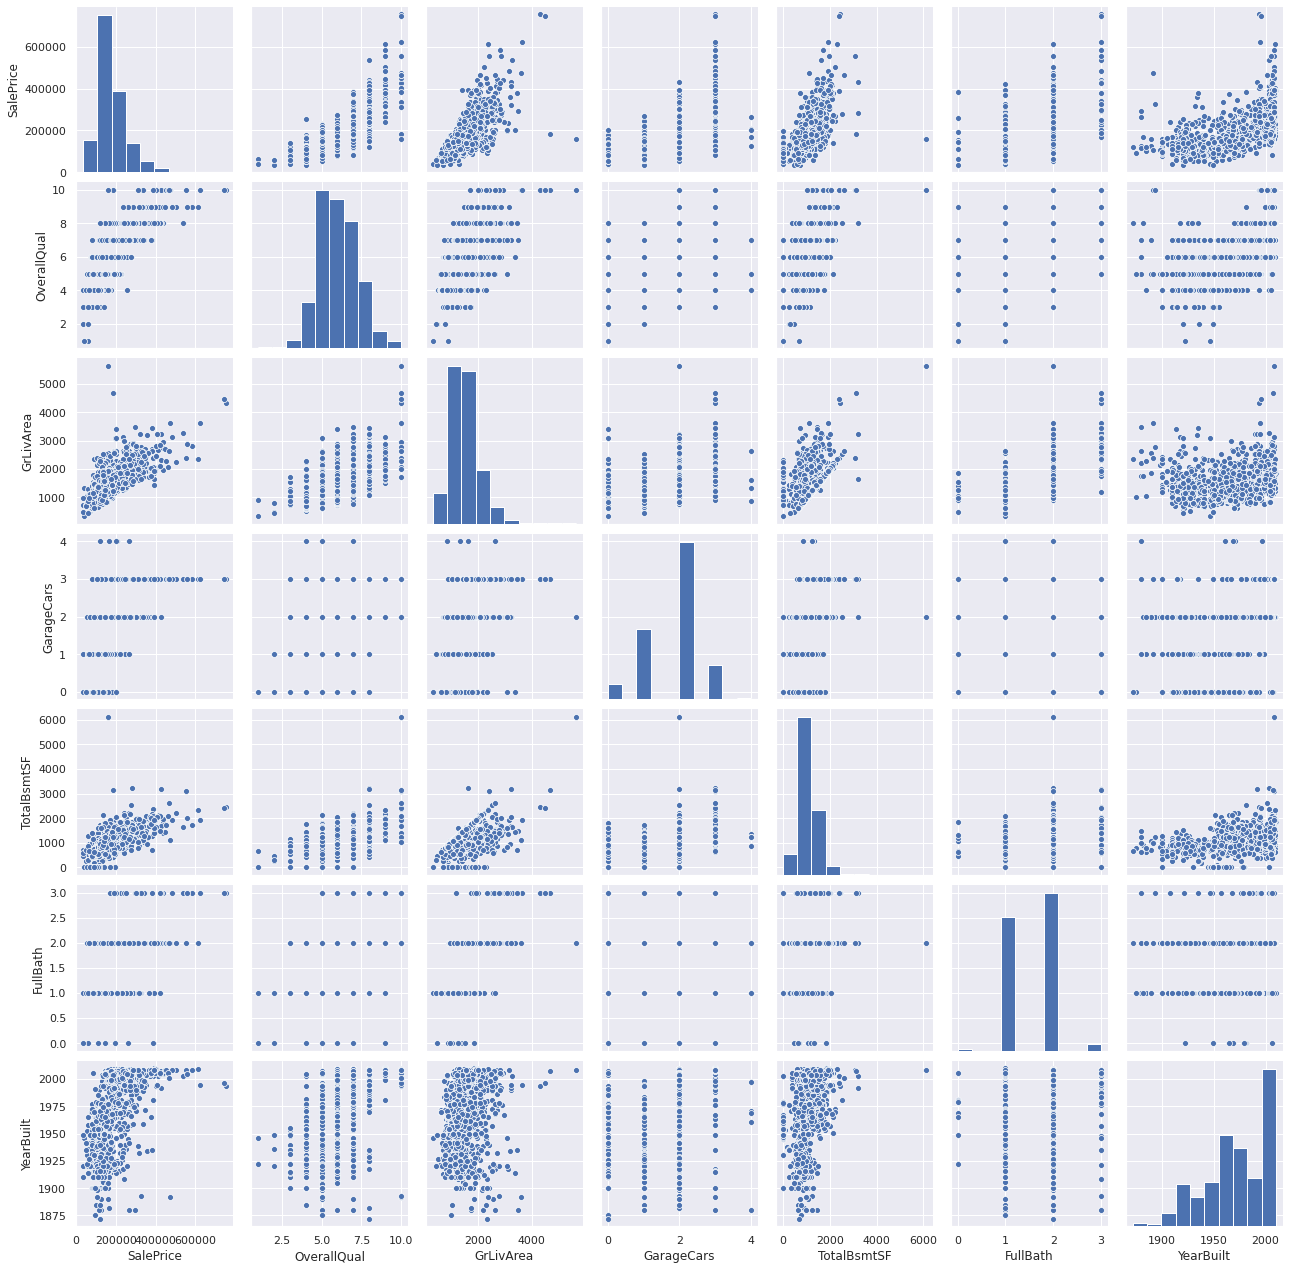

In [39]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

主な数値のいくつかはすでに知っていますが、この散布図は変数の関係についての合理的な指標を与えてくれます。

興味深いと思われる数値の1つは、「TotalBsmtSF」と「GrLiveArea」の間の数値です。この図では、点が直線の線を描いていることがわかります。これは、ほとんど境界線のように機能します。ドットの大部分がその線の下に留まることは完全に理にかなっています。地下エリアは地上のリビングエリアと同じでもかまいませんが、地上のリビングエリアよりも大きな地下エリアは想定されていません（バンカーを購入しようとしている場合を除く）。

「SalePrice」と「YearBuilt」に関するプロットも興味深いです。 「ドットの雲」の下部に、内気な指数関数のように見えるものが表示されます。このような傾向は、「ドットの雲」の上限にも見られます。また、過去数年間の一連の点がこの制限を上回っている傾向があることにも注意してください（価格がより速く上昇していると言いたかっただけです）。

つまり欠けているデータに進みましょう！

# 4. 欠損データ

欠損データについて考える際の重要な質問：

欠落しているデータはどの程度蔓延していますか？
欠損データはランダムですか、それともパターンがありますか？
データの欠落はサンプルサイズの縮小させる可能性があるため、これらの質問への回答は実用する上でかなり重要です。 これにより、分析を続行できなくなる可能性もあります。 さらに、実質的な観点から、欠落データプロセスに偏りがなく、不都合な真実を隠していないことを確認する必要があります。

In [40]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


これを分析して、欠落データの処理方法を理解しましょう。

15％を超えるデータが欠落している場合は、対応する変数を削除し、分析に影響がないようにする必要があります。これは、これらのケースで不足しているデータを埋めるための前処理をしないことを意味します。このことより、（「PoolQC」、「MiscFeature」、「Alley」など）などの削除する必要が変数がいくつかあります。重要なのは、これらのデータは絶対に必要かどうかです。これらの変数のほとんどは、家を購入するときに考える要素とならないため、それほど重要ではないようです（データが欠落しているのはそれが理由でしょうか？）。さらに、変数を詳しく見ると、「PoolQC」、「MiscFeature」、「FireplaceQu」などの変数は外れ値の有力な候補であると言えるので、喜んで削除します。

残りのケースに関しては、「GarageX」変数に同じ数の欠損データがあることがわかります。欠けているデータは同じデータセットを参照しているに違いない（ただし、確認はしませんが、それは5％に過ぎず、20𝑖𝑛5の問題を費やすべきではありません）。ガレージに関する最も重要な情報は「GarageCars」なので、不足しているデータの約5％について議論するのはさほど重要でないため、上記の「GarageX」変数を削除します。同じロジックが「BsmtX」変数に適用されます。

「MasVnrArea」と「MasVnrType」に関しては、これらの変数は必須ではないと考えることができます。さらに、それらはすでに考慮されている「YearBuilt」および「OverallQual」と強い相関があります。したがって、「MasVnrArea」と「MasVnrType」を削除しても、情報が失われることはありません。

最後に、「Electrical」に欠落している所見が1つあります。これは1つの観測にすぎないため、この観測を削除して変数を保持します。

要約すると、欠落データを処理するために、変数「Electrical」を除いて、欠落データのあるすべての変数を削除します。 「電気的」では、データが欠落している観測を削除します。

In [41]:
#dealing with missing data
#delete unnecessary missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

## Out liars!（外れ値）

外れ値も注意すべき点です。 なぜか？ 外れ値はモデルに著しく大きな影響を与える可能性があり、特定の動作に関する洞察を提供する貴重な情報源になる可能性があるためです。

外れ値は非常に重要で複雑な問題であり、外れ値に関して考慮する必要があります。 ここでは、「SalePrice」の標準偏差と一連の散布図を使用して簡単な分析を行います。

**Univariate nalysis**

ここでの重要な観点は、外れ値を探し出すときに定義するしきい値を設定することです。 そのために、データを標準化します。 このコンテキストでは、データの標準化とは、データ値を平均値0と標準偏差1に変換することを意味します。


In [42]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


「SalePrice」を標準化した結果どのように見えるか：

- 低範囲の値はどれも似たり寄ったりで、0から大きく離れていません。
- 高範囲の値は0からはほど遠く、7.xxxxの値はかなり大きなハズレです。

今のところ、これらの値のいずれも異常値とは見なしませんが、これらの2つの値に注意する必要があります。

**Bivariate analysis**

この散布図はすでにみたものですが、 新しい視点から物事を見るとき、新しく何かを発見することがあります。 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


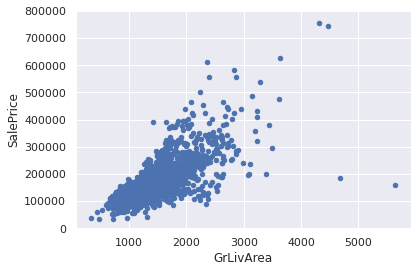

In [43]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


ここからわかること：

'GrLivArea'が大きいデータで普通の物とは外れているデータが２つあります。 この理由を推測すると、おそらくこの２つは農業地域のデータなので低価格を表している可能性があります。これについてはよくわかりませんが、これらの2つの点が典型的なケースを代表するものではないです。したがって、それらを外れ値として定義し、削除します。
その他にも、プロットの上部にある2つのデータは、注意が必要だと述べた7.xxxxのデータ点です。 2つの特殊なケースのように見えますが、傾向に沿っているようです。 そのため、保管しておきます。

In [0]:
#deleting points of outlirs
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


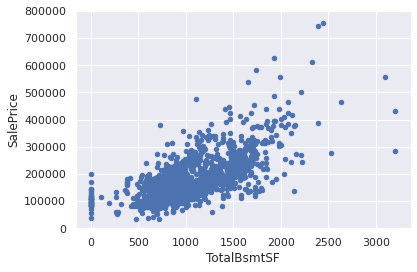

In [45]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));